In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'

gdown.download(url, fname, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: /content/cats_and_dogs_small.zip
90.8MB [00:00, 126MB/s]


'cats_and_dogs_small.zip'

In [ ]:
!mkdir data

In [ ]:
!unzip -q cats_and_dogs_small.zip -d data/cats_and_dogs_small

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
# 하이퍼파라미터

LEARNING_RATE = 0.001
DROPOUT_RATE = 0.5
N_EPOCHS = 50
N_BATCHS = 20
IMAGE_SIZE = 150

In [3]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Input((150,150,3)))

    model.add(layers.Conv2D(filters = 64, kernel_size = 3, padding= 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(padding= 'same'))


    model.add(layers.Conv2D(filters = 128, kernel_size = 3, padding= 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(padding= 'same'))

    model.add(layers.Conv2D(filters = 256, kernel_size = 3, padding= 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(padding= 'same'))


    model.add(layers.Flatten())
    model.add(layers.Dropout(DROPOUT_RATE))
    model.add(layers.Dense(512, activation= 'relu'))

    model.add(layers.Dense(1,activation= 'sigmoid'))

    return model

In [ ]:
model = create_model()

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= LEARNING_RATE),
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
test_dir = '/content/data/cats_and_dogs_small/test'
train_dir = '/content/data/cats_and_dogs_small/train'
validation_dir = '/content/data/cats_and_dogs_small/validation'

In [ ]:
train_datagen = ImageDataGenerator(#rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range= 0.1,
                                   height_shift_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   brightness_range =(0.7,1.3),
                                   fill_mode = 'constant')

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_iterator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = N_BATCHS)


validation_iterator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = N_BATCHS)


test_iterator = train_datagen.flow_from_directory(test_dir,
                                                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = N_BATCHS)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 이미지 확인

batch_image = train_iterator.next()
batch_image[0].shape

(20, 150, 150, 3)

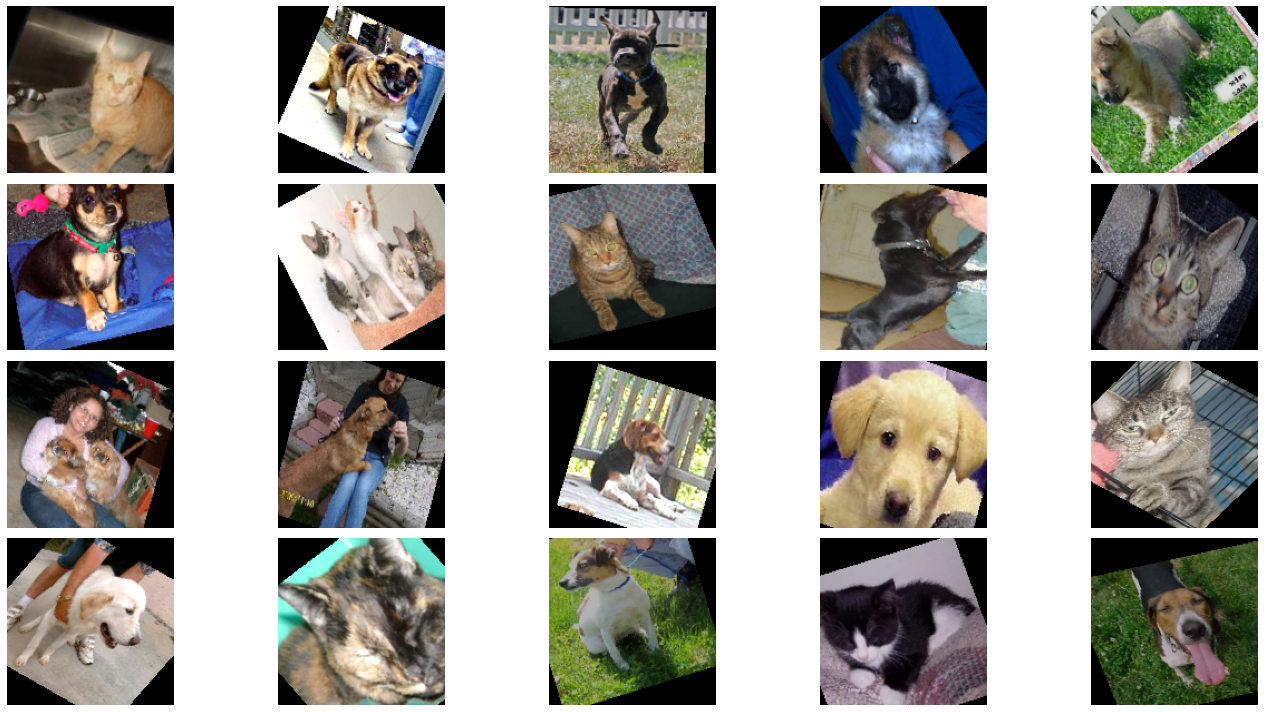

In [ ]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    img= batch_image[0][i].astype('uint8')
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model2 = create_model()
model2.compile(optimizer = keras.optimizers.Adam(learning_rate= LEARNING_RATE),
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model2.fit(train_iterator,
           epochs = N_EPOCHS,
           steps_per_epoch = len(train_iterator),
           validation_data = validation_iterator,
           validation_steps = len(validation_iterator))

Epoch 1/50
100/100 [==============================] - 340s 3s/step - loss: 133.7101 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 2/50
 21/100 [=====>........................] - ETA: 3:52 - loss: 0.6933 - accuracy: 0.5299

KeyboardInterrupt: ignored

In [ ]:
len(train_iterator)

100

In [5]:
# dataframe 이용
import gdown

url = 'https://drive.google.com/uc?id=17ejPJw42TgTv0jCPMMlVTHwF57XYE2kb'
fname = 'cats_and_dogs_union.zip'
gdown.download(url, fname, quiet = True) # 다운 받아짐..

'cats_and_dogs_union.zip'

In [6]:
!mkdir data

In [7]:
!unzip -q ./cats_and_dogs_union.zip -d ./data/cats_and_dogs

In [8]:
import pandas as pd

In [9]:
from glob import glob

path_list = glob('/content/data/cats_and_dogs/**/*.jpg')

In [10]:
path_list[:3]

['/content/data/cats_and_dogs/cats/cat.1303.jpg',
 '/content/data/cats_and_dogs/cats/cat.1974.jpg',
 '/content/data/cats_and_dogs/cats/cat.1335.jpg']

In [11]:
import os

f = '/content/data/cats_and_dogs/dogs/dog.1767.jpg'

print(os.path.basename(f))
print(os.path.dirname(f))
print(os.path.dirname(f).split('/'))
print(os.path.dirname(f).split('/')[4])

dog.1767.jpg
/content/data/cats_and_dogs/dogs
['', 'content', 'data', 'cats_and_dogs', 'dogs']
dogs


In [12]:
label_list=[]
for path in path_list:
    label_list.append(os.path.dirname(path).split('/')[4])

In [13]:
c_d={
    'path':path_list,
     'label':label_list
}

In [14]:
data_df = pd.DataFrame(c_d)

data_df.head(2)

,path,label
0,/content/data/cats_and_dogs/cats/cat.1303.jpg,cats
1,/content/data/cats_and_dogs/cats/cat.1974.jpg,cats


In [15]:
data_df.to_csv('./data/cats_and_dogs_filelist.csv', encoding ='utf-8', index = None)


In [16]:
cats_df= data_df[data_df['label']=='cats']
dogs_df = data_df[data_df['label']=='dogs']

In [17]:
cats_df.shape, dogs_df.shape

((2000, 2), (2000, 2))

In [18]:
split_idx = int(dogs_df.shape[0]*0.8)

In [19]:
train_df = pd.concat([dogs_df[:split_idx],cats_df[:split_idx]], axis = 0)

In [20]:
train_df.shape, train_df['label'].value_counts()

((3200, 2), cats    1600
 dogs    1600
 Name: label, dtype: int64)

In [21]:
test_df = pd.concat([dogs_df[split_idx:], cats_df[split_idx:]], axis = 0)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   brightness_range = (0.7,1.3),
                                   fill_mode = 'constant')

test_datagen = ImageDataGenerator(rescale= 1./255)

In [24]:
train_iterator = test_datagen.flow_from_dataframe(dataframe= train_df,
                                                  x_col = 'path',
                                                  y_col = 'label',
                                                  target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  class_mode = 'binary',
                                                  batch_size = N_BATCHS)

Found 3200 validated image filenames belonging to 2 classes.


In [25]:
test_iterator = test_datagen.flow_from_dataframe(dataframe= test_df,
                                                 x_col = 'path',
                                                 y_col = 'label',
                                                 target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                 class_mode = 'binary',
                                                 batch_size = N_BATCHS)

Found 800 validated image filenames belonging to 2 classes.


In [26]:
train_iterator.class_indices

{'cats': 0, 'dogs': 1}

In [27]:
model = create_model()

In [28]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= LEARNING_RATE),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [29]:
model.fit(train_iterator,
          epochs = N_EPOCHS,
          steps_per_epoch = len(train_iterator),
          validation_data = test_iterator,
          validation_steps = len(test_iterator))

Epoch 1/50
160/160 [==============================] - 46s 81ms/step - loss: 0.9971 - accuracy: 0.5107 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/50
160/160 [==============================] - 13s 80ms/step - loss: 0.6927 - accuracy: 0.5098 - val_loss: 0.6920 - val_accuracy: 0.5350
Epoch 3/50
160/160 [==============================] - 13s 79ms/step - loss: 0.6726 - accuracy: 0.5785 - val_loss: 0.6913 - val_accuracy: 0.5075
Epoch 4/50
160/160 [==============================] - 13s 79ms/step - loss: 0.6770 - accuracy: 0.5738 - val_loss: 0.6548 - val_accuracy: 0.5562
Epoch 5/50
160/160 [==============================] - 13s 80ms/step - loss: 0.6243 - accuracy: 0.6436 - val_loss: 0.5792 - val_accuracy: 0.6900
Epoch 6/50
160/160 [==============================] - 13s 79ms/step - loss: 0.5903 - accuracy: 0.6744 - val_loss: 0.5595 - val_accuracy: 0.7325
Epoch 7/50
160/160 [==============================] - 13s 80ms/step - loss: 0.5542 - accuracy: 0.7259 - val_loss: 0.6254 - val_accuracy:

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [37]:
def cat_dog_sep(path):
    class_name=['cat','dog']
    img = load_img(path, target_size= (IMAGE_SIZE,IMAGE_SIZE))

    sample = img_to_array(img)[np.newaxis,...]
    smaple = sample/255

    pred = model.predict(sample)
    print(pred)
    pred = pred[0,0]
    print(pred)
    pred_class = np.where(pred <0.5, 0 , 1)
    print(pred_class)
    pred_class_name = class_name[pred_class]
    return pred, pred_class, pred_class_name


In [39]:
cat_dog_sep('/content/dog.jpg')

[[1.]]
1.0
1


(1.0, array(1), 'dog')